In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers,Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
import os
import cv2 as cv

C:\Users\Hrishikesh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
path=r"C:\Users\Hrishikesh\Downloads\archive (11)\Car-Bike-Dataset"

In [6]:
L=os.listdir(path)
L

['Bike', 'Car']

In [7]:
data=[]
for i in L:
    A=os.path.join(path,i)
    for j in os.listdir(A):
        B=os.path.join(A,j)
        img=cv.imread(B)
        C=cv.resize(img,(150,150))
        T=L.index(i)
        data.append([C,T])

In [8]:
i=cv.imread(r"C:\Users\Hrishikesh\Downloads\archive (11)\Car-Bike-Dataset\Car\Car (97).jpeg")

In [9]:
i.shape

(183, 275, 3)

In [10]:
data[1]

[array([[[ 97, 140, 137],
         [ 97, 140, 137],
         [ 98, 143, 140],
         ...,
         [ 91, 168, 154],
         [ 89, 169, 155],
         [ 89, 169, 151]],
 
        [[ 95, 145, 140],
         [ 95, 145, 141],
         [ 96, 150, 143],
         ...,
         [ 88, 157, 155],
         [ 85, 156, 154],
         [ 85, 156, 152]],
 
        [[ 96, 146, 142],
         [ 94, 146, 141],
         [ 95, 152, 143],
         ...,
         [ 90, 138, 160],
         [ 88, 140, 159],
         [ 87, 138, 159]],
 
        ...,
 
        [[ 85, 189, 158],
         [ 59, 189, 155],
         [ 59, 180, 153],
         ...,
         [ 33, 158, 107],
         [ 74, 175, 133],
         [ 48, 155, 115]],
 
        [[ 67, 177, 140],
         [ 81, 190, 169],
         [ 51, 178, 148],
         ...,
         [ 97, 193, 163],
         [103, 196, 157],
         [ 56, 162, 133]],
 
        [[ 54, 164, 141],
         [ 90, 196, 171],
         [ 71, 185, 158],
         ...,
         [ 88, 180, 155],
  

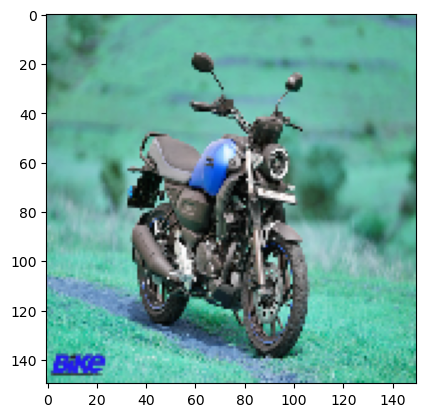

In [11]:
plt.imshow(data[1][0])

In [12]:
len(data)

4000

In [13]:
len(data[1][0])

150

In [14]:
F=[]
T=[]
for i,j in data:
    F.append(i)
    T.append(j)

In [15]:
len(F)

4000

In [16]:
T

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [17]:
T1=pd.get_dummies(T).replace({True:1,False:0})

C:\Users\Hrishikesh\AppData\Local\Temp\ipykernel_5696\3959669914.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T1=pd.get_dummies(T).replace({True:1,False:0})


In [18]:
T1

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3995,0,1
3996,0,1
3997,0,1
3998,0,1


In [19]:
F=np.array(F)

In [20]:
F1=F/255

In [21]:
F1[1]

array([[[0.38039216, 0.54901961, 0.5372549 ],
        [0.38039216, 0.54901961, 0.5372549 ],
        [0.38431373, 0.56078431, 0.54901961],
        ...,
        [0.35686275, 0.65882353, 0.60392157],
        [0.34901961, 0.6627451 , 0.60784314],
        [0.34901961, 0.6627451 , 0.59215686]],

       [[0.37254902, 0.56862745, 0.54901961],
        [0.37254902, 0.56862745, 0.55294118],
        [0.37647059, 0.58823529, 0.56078431],
        ...,
        [0.34509804, 0.61568627, 0.60784314],
        [0.33333333, 0.61176471, 0.60392157],
        [0.33333333, 0.61176471, 0.59607843]],

       [[0.37647059, 0.57254902, 0.55686275],
        [0.36862745, 0.57254902, 0.55294118],
        [0.37254902, 0.59607843, 0.56078431],
        ...,
        [0.35294118, 0.54117647, 0.62745098],
        [0.34509804, 0.54901961, 0.62352941],
        [0.34117647, 0.54117647, 0.62352941]],

       ...,

       [[0.33333333, 0.74117647, 0.61960784],
        [0.23137255, 0.74117647, 0.60784314],
        [0.23137255, 0

In [22]:
F1.shape

(4000, 150, 150, 3)

In [23]:
T1.shape

(4000, 2)

In [24]:
T=np.array(T)

In [25]:
model=Sequential()
model.add(Conv2D(130,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(1,1)))

model.add(Conv2D(80,(4,4),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(80,input_shape=(150,150,3),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=(['accuracy']))

C:\Users\Hrishikesh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.fit(F1,T,epochs=5,validation_split=0.15,batch_size=30)

Epoch 1/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 813s 7s/step - accuracy: 0.5858 - loss: 1.1672 - val_accuracy: 0.6783 - val_loss: 0.5559
Epoch 2/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 680s 6s/step - accuracy: 0.8011 - loss: 0.5194 - val_accuracy: 0.5617 - val_loss: 0.8921
Epoch 3/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 762s 7s/step - accuracy: 0.8552 - loss: 0.3831 - val_accuracy: 0.8700 - val_loss: 0.2921
Epoch 4/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 1090s 10s/step - accuracy: 0.9162 - loss: 0.2229 - val_accuracy: 0.8333 - val_loss: 0.4413
Epoch 5/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 620s 5s/step - accuracy: 0.9710 - loss: 0.0678 - val_accuracy: 0.9367 - val_loss: 0.1909


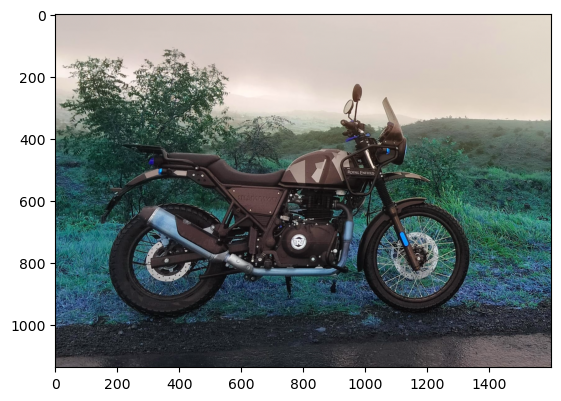

In [39]:
img_path=r"C:\Users\Hrishikesh\Desktop\WhatsApp Image 2024-08-22 at 13.27.33_d49d422f.jpg"
im=cv.imread(img_path)
im=im/255
img_resized=cv.resize(im,(150,150))
img_resized=img_resized.reshape(1,150,150,3)
plt.imshow(im)
plt.show()

In [40]:
prediction=model.predict(img_resized)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


array([[0.00830397]], dtype=float32)

In [43]:
if prediction[0][0]<=0.5:
    print('BIKE')
else:
    print('CAR')

BIKE
